Erro máximo (Euler Explícito) = 2.542786389623963
Erro máximo (Runge-Kutta) = 0.02584592351191617


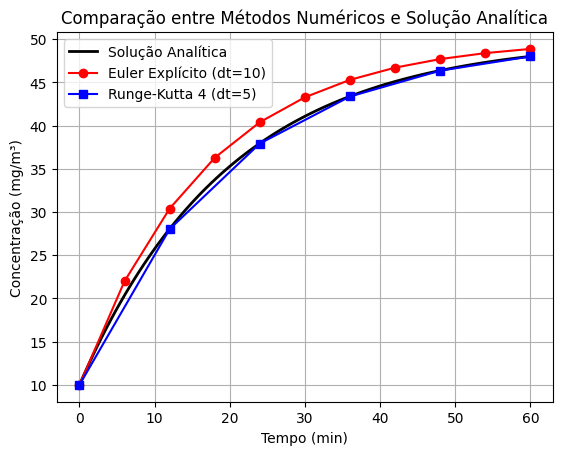

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def euler_explicito(f, u0, t0, tf, n):
    h = (tf - t0) / n
    t = np.zeros(n+1)
    u = np.zeros(n+1)
    t[0] = t0
    u[0] = u0
    for i in range(n):
        t[i+1] = t[i] + h
        u[i+1] = u[i] + h*f(t[i], u[i])
    return t, u


def runge_kutta_4(f, u0, t0, tf, n):
    h = (tf - t0) / n
    t = np.zeros(n+1)
    u = np.zeros(n+1)
    t[0] = t0
    u[0] = u0
    for i in range(n):
        k1 = h*f(t[i], u[i])
        k2 = h*f(t[i] + h/2, u[i] + k1/2)
        k3 = h*f(t[i] + h/2, u[i] + k2/2)
        k4 = h*f(t[i] + h,   u[i] + k3)
        u[i+1] = u[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        t[i+1] = t[i] + h
    return t, u

def analitica(Q, V, c_in, c0, t_values):
    return c_in * (1 - np.exp(- (Q/V) * t_values)) + c0 * np.exp(- (Q/V) * t_values)

def f(t, c):
    return (Q/V)*(c_in - c)

if __name__ == '__main__':
    Q = 5
    V = 100
    c_in = 50
    c0 = 10
    t0 = 0
    tf = 60
    n = 5
    n_euler = 10

    t_euler, c_euler = euler_explicito(f, c0, t0, tf, n_euler)
    t_rk4, c_rk4 = runge_kutta_4(f, c0, t0, tf, n)
    t_exact = np.linspace(t0, tf, 100)
    c_exact = analitica(Q, V, c_in, c0, t_exact)

    c_exact_euler = analitica(Q, V, c_in, c0, t_euler)
    erro_max_euler = np.max(np.abs(c_euler - c_exact_euler))

    c_exact_rk4 = analitica(Q, V, c_in, c0, t_rk4)
    erro_max_rk4 = np.max(np.abs(c_rk4 - c_exact_rk4))

    print(f"Erro máximo (Euler Explícito) = {erro_max_euler}")
    print(f"Erro máximo (Runge-Kutta) = {erro_max_rk4}")

    plt.plot(t_exact, c_exact, label="Solução Analítica", color="black", linewidth=2)
    plt.plot(t_euler, c_euler, 'o-', label="Euler Explícito (dt={})".format(n_euler), color="red")
    plt.plot(t_rk4, c_rk4, 's-', label="Runge-Kutta 4 (dt={})".format(n), color="blue")

    plt.xlabel("Tempo (min)")
    plt.ylabel("Concentração (mg/m³)")
    plt.title("Comparação entre Métodos Numéricos e Solução Analítica")
    plt.legend()
    plt.grid()
    plt.show()


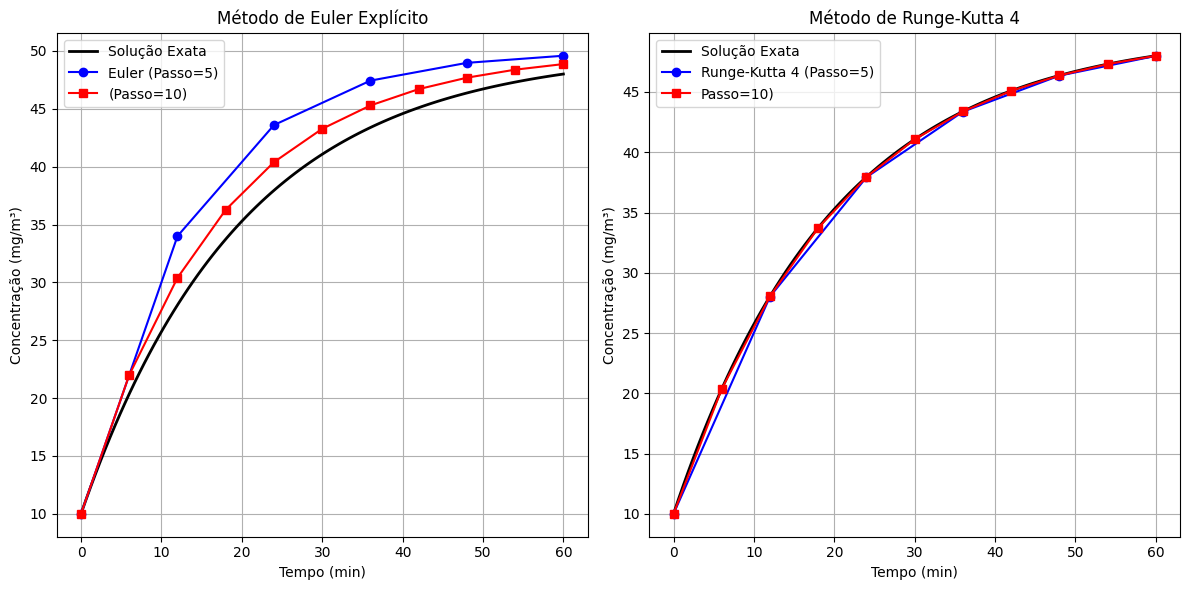

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def euler_explicito(f, u0, t0, tf, n):
    h = (tf - t0) / n
    t = np.zeros(n+1)
    u = np.zeros(n+1)
    t[0] = t0
    u[0] = u0
    for i in range(n):
        t[i+1] = t[i] + h
        u[i+1] = u[i] + h*f(t[i], u[i])
    return t, u


def runge_kutta_4(f, u0, t0, tf, n):
    h = (tf - t0) / n
    t = np.zeros(n+1)
    u = np.zeros(n+1)
    t[0] = t0
    u[0] = u0
    for i in range(n):
        k1 = h*f(t[i], u[i])
        k2 = h*f(t[i] + h/2, u[i] + k1/2)
        k3 = h*f(t[i] + h/2, u[i] + k2/2)
        k4 = h*f(t[i] + h,   u[i] + k3)
        u[i+1] = u[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        t[i+1] = t[i] + h
    return t, u

def analitica(Q, V, c_in, c0, t_values):
    return c_in * (1 - np.exp(- (Q/V) * t_values)) + c0 * np.exp(- (Q/V) * t_values)

def f(t, c):
    return (Q/V)*(c_in - c)

if __name__ == '__main__':
    Q = 5
    V = 100
    c_in = 50
    c0 = 10
    t0 = 0
    tf = 60
    n1 = 5  # Tamanho do passo 1
    n2 = 10 # Tamanho do passo 2

    # Solução analítica
    t_exact = np.linspace(t0, tf, 100)
    c_exact = analitica(Q, V, c_in, c0, t_exact)

    # Método de Euler com diferentes passos
    t_euler_n1, c_euler_n1 = euler_explicito(f, c0, t0, tf, n1)
    t_euler_n2, c_euler_n2 = euler_explicito(f, c0, t0, tf, n2)

    # Método de Runge-Kutta com diferentes passos
    t_rk4_n1, c_rk4_n1 = runge_kutta_4(f, c0, t0, tf, n1)
    t_rk4_n2, c_rk4_n2 = runge_kutta_4(f, c0, t0, tf, n2)

    # Plotando os gráficos
    plt.figure(figsize=(12, 6))

    # Gráfico 1: Euler Explícito
    plt.subplot(1, 2, 1)
    plt.plot(t_exact, c_exact, label="Solução Exata", color="black", linewidth=2)
    plt.plot(t_euler_n1, c_euler_n1, 'o-', label=f"Euler (Passo={n1})", color="blue")
    plt.plot(t_euler_n2, c_euler_n2, 's-', label=f"(Passo={n2})", color="red")
    plt.xlabel("Tempo (min)")
    plt.ylabel("Concentração (mg/m³)")
    plt.title("Método de Euler Explícito")
    plt.legend()
    plt.grid()

    # Gráfico 2: Runge-Kutta 4
    plt.subplot(1, 2, 2)
    plt.plot(t_exact, c_exact, label="Solução Exata", color="black", linewidth=2)
    plt.plot(t_rk4_n1, c_rk4_n1, 'o-', label=f"Runge-Kutta 4 (Passo={n1})", color="blue")
    plt.plot(t_rk4_n2, c_rk4_n2, 's-', label=f"Passo={n2})", color="red")
    plt.xlabel("Tempo (min)")
    plt.ylabel("Concentração (mg/m³)")
    plt.title("Método de Runge-Kutta 4")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

Tempos t_90 (em min) de cada reator euler: [20.625 30.    11.25  35.625 69.375]
Tempos t_90 (em min) de cada reator rk4: [24.375 33.75  13.125 37.5   71.25 ]


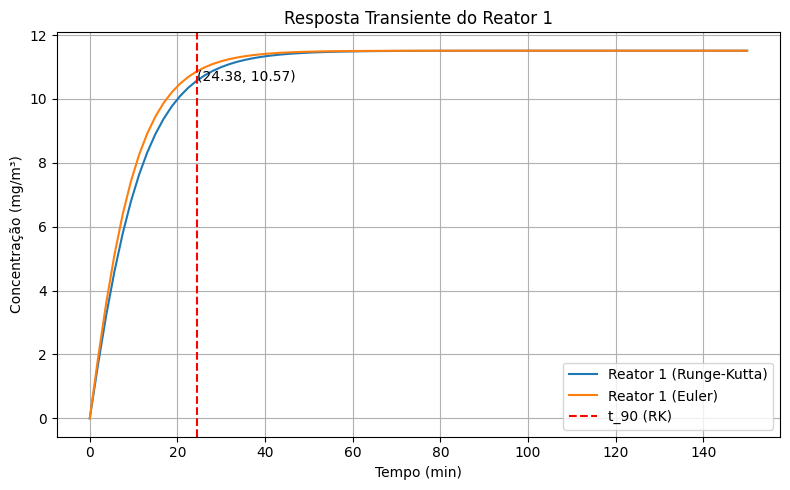

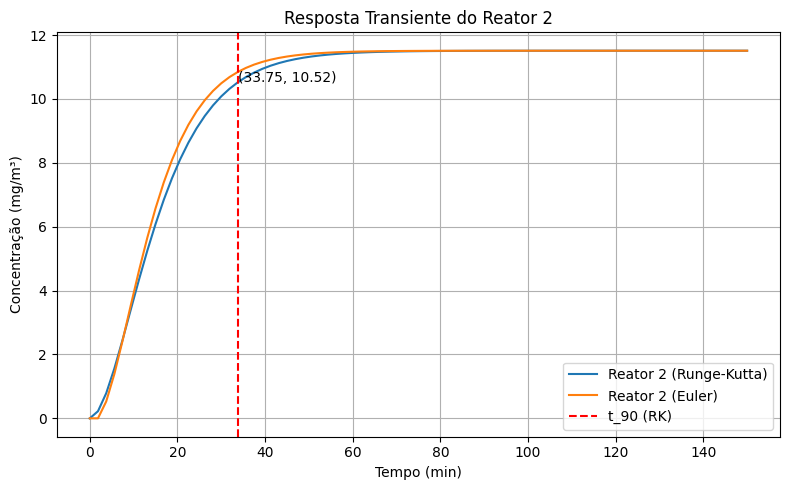

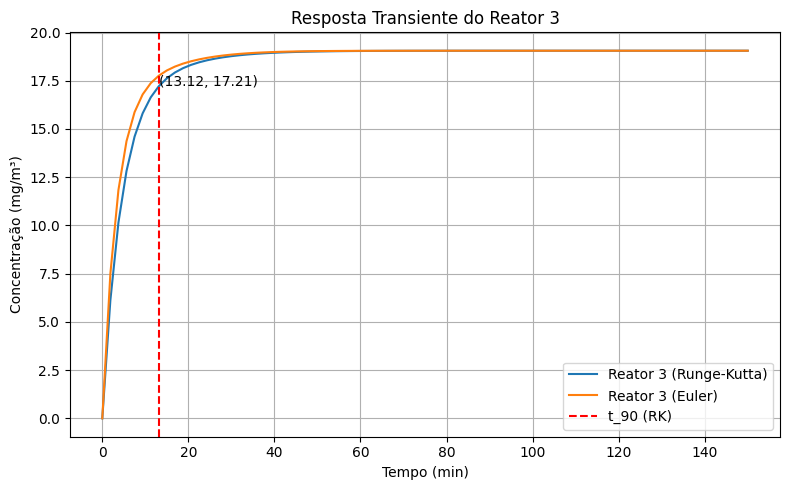

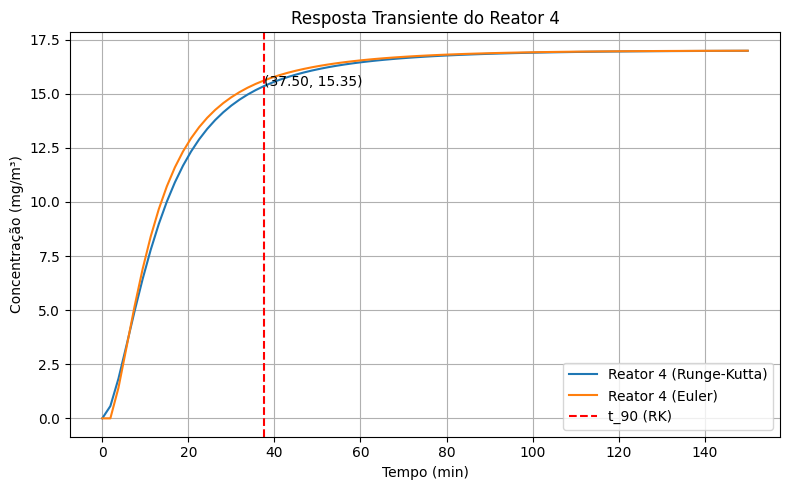

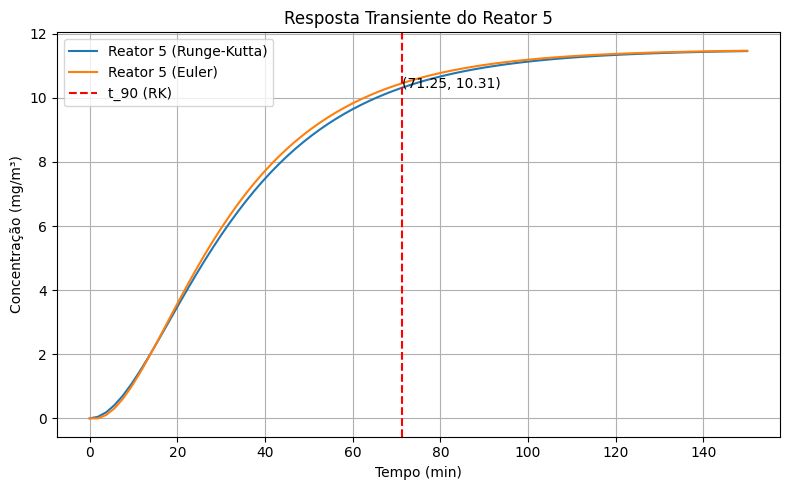

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def begin_methods(t0, tf, n, u0):
    h = (tf - t0) / n
    t = np.linspace(t0, tf, n + 1)
    dim = len(u0)
    u = np.zeros((dim, n + 1))
    u[:, 0] = u0

    return h, t, dim, u

def euler_explicito(f, u0, t0, tf, n):
    h, t, dim, u = begin_methods(t0, tf, n, u0)

    for i in range(n):
        for j in range(dim):
            u[j, i+1] = u[j, i] + h * f[j](t[i], u[:, i])

    return t, u

def runge_kutta(f, u0, t0, tf, n):
    h, t, dim, u = begin_methods(t0, tf, n, u0)

    for i in range(n):
        k1 = np.zeros(dim)
        k2 = np.zeros(dim)
        k3 = np.zeros(dim)
        k4 = np.zeros(dim)

        for j in range(dim):
            k1[j] = f[j](t[i], u[:, i])
            k2[j] = f[j](t[i] + h / 2, u[:, i] + (h / 2) * k1)
            k3[j] = f[j](t[i] + h / 2, u[:, i] + (h / 2) * k2)
            k4[j] = f[j](t[i] + h, u[:, i] + h * k3)

            u[j, i + 1] = u[j, i] + (h / 6) * (k1[j] + 2 * k2[j] + 2 * k3[j] + k4[j])

    return t, u

def calc_t90(c, t, porcentagem):
    n = len(c)
    t_90 = np.zeros(n)

    for i in range(n):
        c0_i = c[i, 0]
        c_est_i = c[i, -1]

        c_90 = c0_i + (c_est_i - c0_i) * porcentagem

        if c_est_i > c0_i:
          idx = np.where(c[i, :] >= c_90)[0]

        else:
          idx = np.where(c[i, :] <= c_90)[0]


        if len(idx) > 0:
          i_90 = t[idx[0]]
          t_90[i] = i_90
        else:
          t_90[i] = 0

    return t_90

def f1(t, c):
    return (5 * 10 / 50) + (1 / 50) * c[2] - (6 / 50) * c[0]

def f2(t, c):
    return (3 / 20) * c[0] - (3 / 20) * c[1]

def f3(t, c):
    return (8 * 20 / 40) + (1 / 40) * c[1] - (9 / 40) * c[2]

def f4(t, c):
    return (1 / 80) * c[1] + (8 / 80) * c[2] + (2 / 80) * c[4] - (11 / 80) * c[3]

def f5(t, c):
    return (3 / 100) * c[0] + (1 / 100) * c[1] - (4 / 100) * c[4]

if __name__ == '__main__':
    f = [f1, f2, f3, f4, f5]
    c0 = [0, 0, 0, 0, 0]
    t0 = 0
    tf = 150
    n = 80

    t_rk4, c_rk4 = runge_kutta(f, c0, t0, tf, n)
    t_euler, c_euler = euler_explicito(f, c0, t0, tf, n)

    ##parametrizaçao
    t_90_rk = calc_t90(c_rk4, t_rk4, 0.9)
    t_90_euler = calc_t90(c_euler, t_euler, 0.9)

    print("Tempos t_90 (em min) de cada reator euler:", t_90_euler)
    print("Tempos t_90 (em min) de cada reator rk4:", t_90_rk)

    for j in range(5):
        plt.figure(figsize=(8, 5))

        plt.plot(t_rk4, c_rk4[j, :], label=f'Reator {j + 1} (Runge-Kutta)')
        plt.plot(t_euler, c_euler[j, :], label=f'Reator {j + 1} (Euler)')

        plt.axvline(t_90_rk[j], color='r', linestyle='--',
                label=f't_90 (RK)')

        c_t90_rk = np.interp(t_90_rk[j], t_rk4, c_rk4[j, :])

        plt.text(
          t_90_rk[j],
          c_t90_rk,
          f"({t_90_rk[j]:.2f}, {c_t90_rk:.2f})"
        )


        plt.xlabel("Tempo (min)")
        plt.ylabel("Concentração (mg/m³)")
        plt.title(f"Resposta Transiente do Reator {j + 1}")
        plt.legend()
        plt.grid()
        plt.tight_layout()

    plt.show()
